In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [10]:
df = pd.read_csv("D:\\college\\Data Mining\\Data Mining Exp8\\Customer_data_for_Clustering.csv")

In [11]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
encoder = LabelEncoder()
encoder.fit(df['Gender'].astype(str))
df['Gender'] = encoder.transform(df['Gender'].astype(str))


In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [22]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)
normalized_df

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4
0,-0.559578,0.366302,-0.462546,-0.564639,-0.141176
1,-0.532158,0.351889,-0.399576,-0.542422,0.372960
2,-0.502270,-0.263632,-0.402347,-0.505856,-0.510342
3,-0.561894,-0.297984,-0.382396,-0.571771,0.349759
4,-0.636181,-0.340913,-0.216672,-0.639462,-0.152295
5,-0.555095,-0.300609,-0.410103,-0.563862,0.339674
6,-0.537798,-0.294356,-0.091754,-0.539459,-0.569818
7,-0.502228,-0.277860,-0.356571,-0.509226,0.533016
8,-0.440980,0.313906,0.502218,-0.441390,-0.509855
9,-0.597661,-0.337966,-0.242162,-0.604828,0.322678


In [27]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(normalized_df)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1','P2']
df_principal

,P1,P2
0,-0.587823,0.251336
1,-0.518004,0.131250
2,-0.722251,-0.150127
3,-0.736891,-0.381058
4,-0.913203,-0.189819
5,-0.725049,-0.395602
6,-0.823621,-0.000494
7,-0.635667,-0.411624
8,-0.602195,0.755069
9,-0.814979,-0.331166


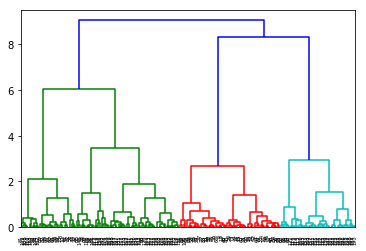

In [28]:
dendrogram = shc.dendrogram((shc.linkage(df_principal, method='ward')))

In [31]:
silhouette = []
for i in range(2,8):
    silhouette.append(silhouette_score(df_principal,AgglomerativeClustering(n_clusters = i).fit_predict(df_principal)))
    


In [32]:
silhouette

[0.3273156230620926,
 0.401856246508586,
 0.4584202511163409,
 0.44979147870610886,
 0.44928099111791797,
 0.4450879875943359]

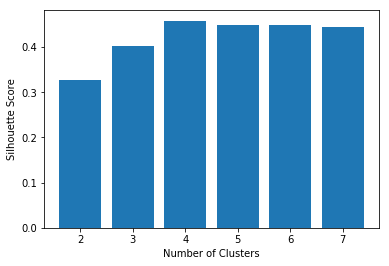

In [33]:
k = [2,3,4,5,6,7]
plt.bar(k,silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

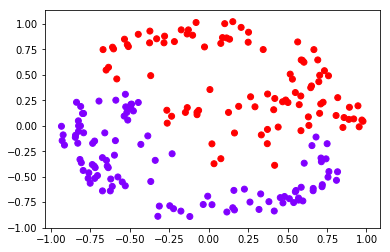

In [37]:
agglomerative2 = AgglomerativeClustering(n_clusters = 2)
plt.figure()
plt.scatter(df_principal['P1'],df_principal['P2'],c = agglomerative2.fit_predict(df_principal),cmap = 'rainbow')
plt.show()

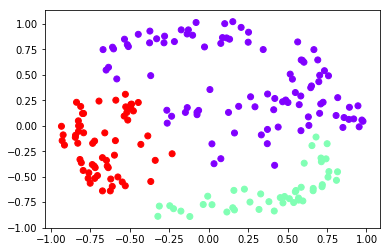

In [39]:
agglomerative3 = AgglomerativeClustering(n_clusters = 3)
plt.figure()
plt.scatter(df_principal['P1'],df_principal['P2'],c = agglomerative3.fit_predict(df_principal),cmap = 'rainbow')
plt.show()

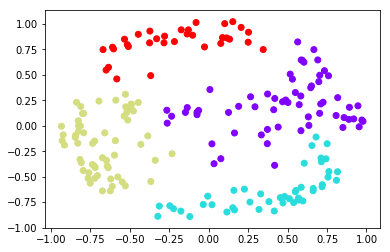

In [40]:
agglomerative4 = AgglomerativeClustering(n_clusters = 4)
plt.figure()
plt.scatter(df_principal['P1'],df_principal['P2'],c = agglomerative4.fit_predict(df_principal),cmap = 'rainbow')
plt.show()

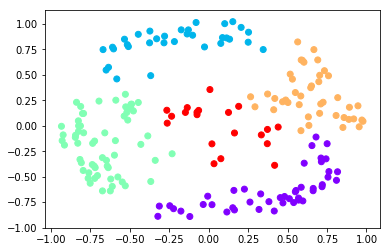

In [41]:
agglomerative5 = AgglomerativeClustering(n_clusters = 5)
plt.figure()
plt.scatter(df_principal['P1'],df_principal['P2'],c = agglomerative5.fit_predict(df_principal),cmap = 'rainbow')
plt.show()

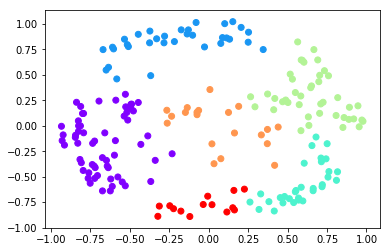

In [42]:
agglomerative6 = AgglomerativeClustering(n_clusters = 6)
plt.figure()
plt.scatter(df_principal['P1'],df_principal['P2'],c = agglomerative6.fit_predict(df_principal),cmap = 'rainbow')
plt.show()

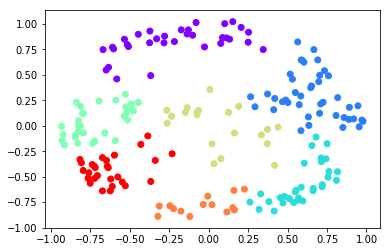

In [43]:
agglomerative7 = AgglomerativeClustering(n_clusters = 7)
plt.figure()
plt.scatter(df_principal['P1'],df_principal['P2'],c = agglomerative7.fit_predict(df_principal),cmap = 'rainbow')
plt.show()